# Arbitrary Convolution

Stephen Iota

July 2018

A convonvolution of two arbitrary functions is defined as:
$$(f*g)(x) \equiv \int_{-\infty}^{\infty}f(t)g(x-t)dt$$
A 1D linear discrete convolution can be written as:
$$(f*g)(x) = \sum_{t=0}^{N} f(t)g(x-t)$$
where $g(x-t)$ is treated as the *kernal* and $N$ is the *length* of $f(t)$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Main Function

In [2]:
def my_conv(a,ker):
    # for array len
    if len(a) < len(ker):
        a,ker = ker,a
        
    #reverse order of kernal   
    ker = ker[::-1]
    
    #initialize output array
    out = np.zeros(len(a)+len(ker)-1)

    #zero padding
    if len(a) != len(out):
        temp = np.zeros(len(out))
        temp[len(out)-len(a):] = a[:len(a)]
        a = temp
    if len(ker) != len(out):
        temp = np.zeros(len(out))
        temp[:len(ker)] = ker[:len(ker)]
        ker = temp
        
    #circular boundary conditions
    #rolling kernal
    
    for step in range(len(out): #enumerate? 
        out[step] = np.sum(a*ker)
        ker = np.roll(ker,1)
        
    
    return out

Comparing my implementation vs `np.convolve`

In [3]:
f = np.random.randint(1,10,size=7)
g = np.random.randint(-4,14,size=4)

In [4]:
print(my_conv(f,g))
print(np.convolve(f,g))

[ 32.  84.  64.  76.  57.  66. 109.  67.   9.   8.]
[ 32  84  64  76  57  66 109  67   9   8]


In [5]:
%timeit my_conv(f,g)
%timeit np.convolve(f,g)

251 µs ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.47 µs ± 40.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [20]:
a = np.arange(0,7,1)
b = np.arange(0,4,1)
c = np.arange(0,10,1)

z = my_conv(f,g)

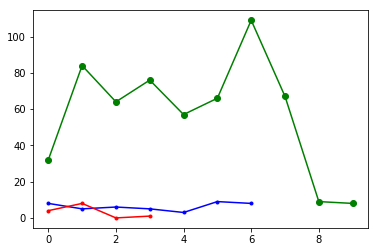

In [31]:
plt.plot(a,f,'b.-')
plt.plot(b,g,'r.-')
plt.plot(c,z,'go-')
plt.show()

In [15]:
plt.plot?